In [2]:
import os
import sys
sys.path.append(os.path.join('../dqn_image'))

from matplotlib import pyplot as plt
from sklearn.cluster import SpectralClustering
from mrcnn_module import *
mrcnn = MaskRCNN(scale=1)

Using TensorFlow backend.


Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


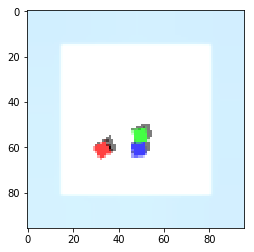

In [89]:
image = np.load('../dqn_image/seg_fault4.npy').astype(np.uint8)
plt.imshow(image)

In [85]:
black, white, bg = mrcnn.get_masks(image)

In [86]:
len(black)

1

In [87]:
len(white)

3

In [88]:
len(bg)

2

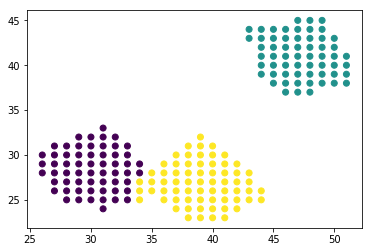

In [83]:
masks = np.zeros([96, 96])
masks += np.sum(bg, 0)

my, mx = np.nonzero(masks)
points = list(zip(mx, my, np.ones_like(mx) * 96))
z = (np.array(points).T / np.linalg.norm(points, axis=1)).T

im_blur = cv2.blur(image, (5,5))
colors = np.array([im_blur[y, x]/(4*255) for x, y in zip(mx, my)])
z_color = np.concatenate([z, colors], 1)
clusters = SpectralClustering(n_clusters=3, n_init=10).fit_predict(z_color)

plt.scatter(mx, my, c=clusters)

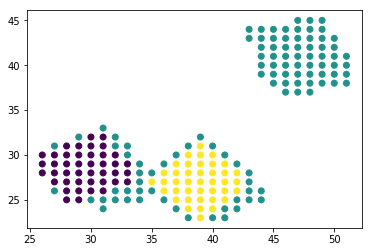

In [69]:
masks = np.zeros([96, 96])
masks += np.sum(bg, 0)

my, mx = np.nonzero(masks)
points = list(zip(mx, my, np.ones_like(mx) * 96))
z = (np.array(points).T / np.linalg.norm(points, axis=1)).T

colors = np.array([image[y, x]/255 for x, y in zip(mx, my)])
z_color = np.concatenate([z, colors], 1)
clusters = SpectralClustering(n_clusters=3, n_init=10).fit_predict(z_color)

plt.scatter(mx, my, c=clusters)

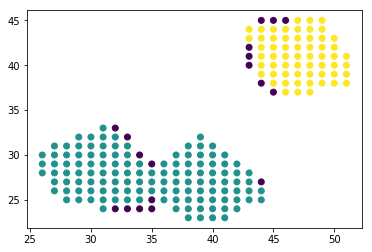

In [57]:
masks = np.concatenate([white, bg])
# masks = np.concatenate([black, white, bg])
masks = masks.transpose([1,2,0])

my, mx = np.nonzero(masks.sum(2))
points = list(zip(mx, my, np.ones_like(mx) * 96))
z = (np.array(points).T / np.linalg.norm(points, axis=1)).T

colors = np.array([masks[y, x]/4 for x, y in zip(mx, my)])
z_color = np.concatenate([z, colors], 1)
clusters = SpectralClustering(n_clusters=3, n_init=10).fit_predict(z_color)

plt.scatter(mx, my, c=clusters)

In [44]:
z_color[:5]

array([[0.35924271, 0.21743638, 0.90756052, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.00392157],
       [0.36743433, 0.21669204, 0.90445374, 0.00392157, 0.        ,
        0.        , 0.00392157, 0.        , 0.00392157],
       [0.37554133, 0.21593627, 0.90129919, 0.00392157, 0.        ,
        0.        , 0.00392157, 0.        , 0.00392157],
       [0.38356304, 0.21516951, 0.89809881, 0.00392157, 0.        ,
        0.        , 0.00392157, 0.        , 0.00392157],
       [0.39149885, 0.21439223, 0.89485452, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [3]:
from backgroundsubtraction_module import BackgroundSubtraction

backsub = BackgroundSubtraction()

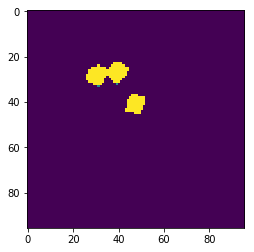

In [5]:
image = np.load('../dqn_image/seg_fault.npy').astype(np.uint8)
m, c, fm = backsub.get_masks(image)
plt.imshow(fm)

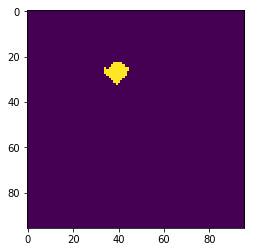

In [7]:
plt.imshow(m[0])

In [91]:
x, y = np.nonzero(m[2])
points = np.array(list(zip(x, y)))
M = cv2.moments(points)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print(cX, cY)

48 42


In [93]:
x, y = np.nonzero(np.zeros_like(m[2]))
points = np.array(list(zip(x, y)))
M = cv2.moments(points)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print(cX, cY)

ZeroDivisionError: float division by zero

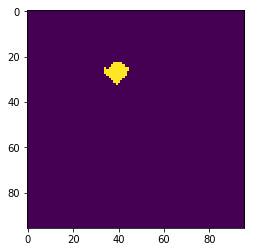

In [46]:
_m = m[0].copy()
cv2.circle(_m, (cY, cX), 1, 1, -1)
plt.imshow(_m)

In [73]:
c1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [0.5, 0.5, 0.5]])
c2 = np.array([[0.2, 0.8, 0.3], [0.9, 0.1, 0], [0.2, 0.3, 1], [0.5, 0.4, 0.6]])
np.linalg.norm(c1 - c2, axis=0)

array([1.22065556, 1.24498996, 0.31622777])

In [74]:
c1 - c2

array([[ 0.8, -0.8, -0.3],
       [-0.9,  0.9,  0. ],
       [-0.2, -0.3,  0. ],
       [ 0. ,  0.1, -0.1]])

In [76]:
np.tile(c1, 4).reshape([4,4,3])

array([[[1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ]],

       [[0. , 1. , 0. ],
        [0. , 1. , 0. ],
        [0. , 1. , 0. ],
        [0. , 1. , 0. ]],

       [[0. , 0. , 1. ],
        [0. , 0. , 1. ],
        [0. , 0. , 1. ],
        [0. , 0. , 1. ]],

       [[0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]]])

In [77]:
c3 = np.tile(c1, 4).reshape([4,4,3])
c2 - c3

array([[[-0.8,  0.8,  0.3],
        [-0.1,  0.1,  0. ],
        [-0.8,  0.3,  1. ],
        [-0.5,  0.4,  0.6]],

       [[ 0.2, -0.2,  0.3],
        [ 0.9, -0.9,  0. ],
        [ 0.2, -0.7,  1. ],
        [ 0.5, -0.6,  0.6]],

       [[ 0.2,  0.8, -0.7],
        [ 0.9,  0.1, -1. ],
        [ 0.2,  0.3,  0. ],
        [ 0.5,  0.4, -0.4]],

       [[-0.3,  0.3, -0.2],
        [ 0.4, -0.4, -0.5],
        [-0.3, -0.2,  0.5],
        [ 0. , -0.1,  0.1]]])

In [78]:
np.linalg.norm(c3 - c2, axis=-1)

array([[1.17046999, 0.14142136, 1.31529464, 0.87749644],
       [0.41231056, 1.27279221, 1.23693169, 0.98488578],
       [1.08166538, 1.34907376, 0.36055513, 0.75498344],
       [0.46904158, 0.75498344, 0.6164414 , 0.14142136]])

In [79]:
np.argmin(np.linalg.norm(c3 - c2, axis=-1), 0)

array([1, 0, 2, 3])

In [89]:
np.random.choice(set([1,2,3]) - set([1]))

ValueError: 'a' must be 1-dimensional or an integer

{2, 3}